In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Define a function

In [39]:
def dfdx(x,f):
    return x**2 + x

# and its integral

In [40]:
def f_int(x,C):
    return (x**3)/3. + 0.5*x**2 + C

# Define the Second order RK method

In [41]:
def rk2_core(x_i,f_i,h,g):
    
    x_ipoh = x_i + 0.5*h
    f_ipoh = f_i + 0.5*h*g(x_i,f_i)
    
    f_ipo = f_i + h*g(x_ipoh, f_ipoh)
    
    return f_ipo

In [42]:
def rk2(dfdx,a,b,f_a,N):
    
    x = np.linspace(a,b,N)
    
    h = x[1]-x[0]
    
    f = np.zeros(N,dtype=float)
    
    f[0] = f_a
    
    for i in range(1,N):
        f[i] = rk2_core(x[i-1],f[i-1],h,dfdx)
    return x,f

In [43]:
def rk4_core(x_i,f_i,h,g):
    
    x_ipoh = x_i + 0.5*h
    x_ipo = x_i + h
    
    k_1 = h*g(x_i,f_i)
    k_2 = h*g(x_ipoh, f_i + 0.5*k_1)
    k_3 = h*g(x_ipoh, f_i + 0.5*k_2)
    k_4 = h*g(x_ipo, f_i + k_3)
    
    f_ipo = f_i + (k_1 + 2*k_2 +2*k_3 + k_4)/6.
    
    return f_ipo

In [44]:
def rk4(dfdx,a,b,f_a,N):
    
    x = np.linspace(a,b,N)
    
    h = x[1]-x[0]
    
    f = np.zeros(N,dtype=float)
    
    f[0] = f_a
    
    for i in range(1,N):
        f[i] = rk4_core(x[i-1],f[i-1],h,dfdx)
    return x,f

Text(0, 0.5, 'f(x)')

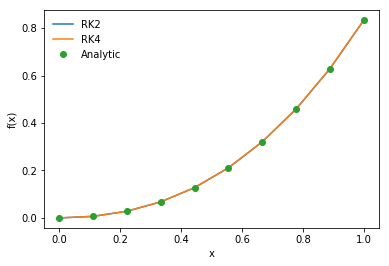

In [56]:
a = 0.0
b = 1.0
f_a =  0.0
N = 10
x_2, f_2 = rk2(dfdx,a,b,f_a,N)
x_4, f_4 = rk4(dfdx,a,b,f_a,N)
x = x_2.copy()
plt.plot(x_2,f_2,label='RK2')
plt.plot(x_4,f_4,label='RK4')
plt.plot(x,f_int(x,f_a),'o',label='Analytic')
plt.legend(frameon=False)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

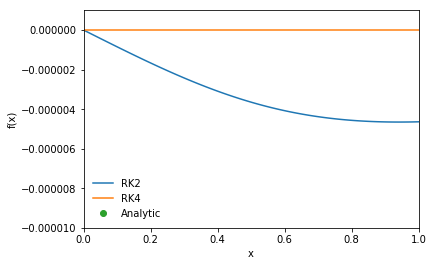

In [63]:
a = 0.0
b = 1.0
f_a =  1.0
N = 100
x_2, f_2 = rk2(dfdx,a,b,f_a,N)
x_4, f_4 = rk4(dfdx,a,b,f_a,N)
x = x_2.copy()
f_analytic = f_int(x,f_a)

error_2 = (f_2 - f_analytic)/f_analytic
error_4 = (f_4 - f_analytic)/f_analytic


plt.plot(x_2,error_2,label='RK2')
plt.plot(x_4,error_4,label='RK4')
plt.plot(x,f_int(x,f_a),'o',label='Analytic')
plt.legend(frameon=False)
plt.ylim(-1.0e-5,1.0e-6)
plt.xlim(0,1)
plt.xlabel('x')
plt.ylabel('f(x)')

In [61]:
print(error_4)

[ 0.00000000e+00  0.00000000e+00 -2.21998694e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.21283200e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.19641367e-16  0.00000000e+00
  2.18878092e-16  2.18455127e-16  2.18004452e-16  2.17525980e-16
  2.17019651e-16  2.16485433e-16  2.15923322e-16  4.30666684e-16
  4.29431091e-16  4.28140025e-16  4.26793703e-16  4.25392399e-16
  4.23936443e-16  4.22426221e-16  2.10431087e-16  4.19244800e-16
  4.17574648e-16  4.15852324e-16  4.14078482e-16  4.12253831e-16
  2.05189564e-16  4.08455181e-16  2.03241420e-16  2.02231504e-16
  4.02396624e-16  4.00284677e-16  3.98128190e-16  1.97964115e-16
  1.96842947e-16  3.91402321e-16  3.89078676e-16  3.86716157e-16
  3.84315991e-16  3.81879427e-16  3.79407742e-16  3.76902230e-16
  3.74364206e-16  3.71795003e-16  1.84597982e-16  1.83284224e-16
  1.81956910e-16  3.61233457e-16  3.58528737e-16  3.55801042e-16
  3.53051757e-16  3.50282